In [ ]:
# Test and profile code for issue #508 - very slow masking for non-trivial polygons

In [1]:
bayern = "POLYGON ((8.988519315417134 50.07690029222578, 9.014491278219536 50.12086643754361, 9.117925335010966 50.13661307078344, 9.163382042922223 50.11955443470952, 9.178009119209406 50.14697566207821, 9.220160674663058 50.15927081871241, 9.378322075504247 50.13929406036985, 9.414419713006581 50.09423617594047, 9.505349581065666 50.10609641018912, 9.497601722515512 50.14633640494367, 9.510648549406476 50.15832991680819, 9.488392917725786 50.17459311279345, 9.4939128745222 50.25034898747601, 9.602382056723904 50.23213086331354, 9.627012650860184 50.24133615396314, 9.647438801411509 50.27859593237662, 9.734971685897529 50.3152020619631, 9.723179879040613 50.35800055266457, 9.755861647437264 50.43371164641425, 9.806642549749293 50.43313884042209, 9.856109391381256 50.40862492231527, 9.952740992865383 50.43269275043937, 10.02220719359622 50.48747074687488, 10.03323846344959 50.52347903982995, 10.10669561031658 50.5737256567084, 10.13956283691912 50.55550188806072, 10.20797390781396 50.56382169451819, 10.23956967646216 50.52405540902371, 10.33655048352753 50.50230024918703, 10.34886237080633 50.47283481626388, 10.41211278780685 50.43038522225848, 10.40065982881189 50.40602309457834, 10.45230914748303 50.41264492982292, 10.50553603619803 50.36802288511721, 10.54799152466461 50.3738415464826, 10.5637051191699 50.34769591974889, 10.60692495239756 50.34139281584996, 10.61817411420881 50.23389686882147, 10.68920476019331 50.23559254014941, 10.71942583147929 50.21611964043942, 10.71683641593808 50.25015462871037, 10.7303304753885 50.26166771273948, 10.8410273533914 50.25477796375823, 10.70916195540265 50.31335738887618, 10.70747890094657 50.36986423731813, 10.75118401200594 50.36806974705962, 10.78164925633632 50.39444447875429, 10.83018048946613 50.40261205347578, 10.93871396518561 50.40184669598533, 10.98271001598388 50.36403697822553, 11.01030712686458 50.37493877110303, 11.05254427600947 50.35772278456933, 11.11734951926257 50.37679564926221, 11.16799797141128 50.33514059117112, 11.16638659958449 50.31806544105078, 11.14363594686121 50.30759622900532, 11.15234376638936 50.29714786687256, 11.19923688606692 50.30175949118953, 11.24719126138215 50.27954586032043, 11.25251116012604 50.35363091668864, 11.26950772915985 50.36497358618055, 11.24842676755344 50.39733940222617, 11.25718551672886 50.43107723560124, 11.2379630565467 50.44484240270177, 11.23831697720995 50.48205622763959, 11.31278452551923 50.49932592344513, 11.31448810423175 50.51583690860726, 11.34369469361781 50.5311130170479, 11.431886370741 50.52302281096019, 11.45068762587827 50.49980108476807, 11.42893042665573 50.45073017690209, 11.48731941947303 50.43980219495223, 11.49623349960727 50.40962841325555, 11.52939942895392 50.38943438370064, 11.59102569858435 50.41250765986345, 11.62312110712733 50.3976297807229, 11.78081856243529 50.42873864643965, 11.83627486191915 50.40628300435619, 11.93678296467437 50.43345072539613, 11.99070811528118 50.39607163538496, 11.9946453204487 50.36363111568818, 12.04868137261356 50.34105538266463, 12.09493526712142 50.34194233435701, 12.13288788914008 50.31461411731277, 12.1491885693402 50.27388908735522, 12.11237588837168 50.25465644040498, 12.15629939063127 50.24440367736053, 12.20621459436575 50.20372016539903, 12.22562606565152 50.16875947929639, 12.207296165518 50.1365859000157, 12.21448588031773 50.11269142629233, 12.25262175737204 50.10544714839559, 12.28284795457348 50.08303526201431, 12.28049182810498 50.06754024744583, 12.49459891173039 49.99056611280752, 12.50925419491679 49.97074223401418, 12.48249284745776 49.94569104988562, 12.55563759504879 49.92651133755173, 12.5567273569656 49.89341159181086, 12.50424826350008 49.83018019595942, 12.48477181908663 49.83080510794424, 12.47997238973908 49.77904947110755, 12.41320825070514 49.75460696537996, 12.44789618894602 49.71253017743788, 12.52931657482568 49.69318565057235, 12.53820214717539 49.63557267147222, 12.56855437493557 49.62549367167717, 12.58394614421924 49.56506102748265, 12.60489770941278 49.54197105832789, 12.65273024083409 49.52823637531364, 12.65115851587024 49.47800389187431, 12.66828776382376 49.44095366230759, 12.76067612304873 49.40467108616726, 12.79095119784895 49.35457232601015, 12.94487282002817 49.35401452584318, 13.03352778307255 49.31353992788787, 13.03925428932117 49.27456619482573, 13.08792144682617 49.25466872772573, 13.1231997237272 49.20826212264842, 13.18042891874621 49.17813344804564, 13.18835270219727 49.14270333105618, 13.23683078501066 49.12391618957023, 13.29271486973688 49.12778565637596, 13.40359105709642 49.05868365702741, 13.41401655446309 48.99275847177709, 13.43331792337648 48.98211844797828, 13.49721553138115 48.95181371460879, 13.50473043534257 48.97873936573502, 13.5824389039934 48.98073068775824, 13.60319286655028 48.95482289368339, 13.63631675426784 48.95570149378022, 13.67943910325343 48.88945802490941, 13.74270359845449 48.89464532210075, 13.77422054177154 48.84177755918817, 13.80212374976935 48.83451465649544, 13.82516257698615 48.79865884487776, 13.81888166089047 48.78280703140515, 13.84931422597338 48.77434804333809, 13.81529809751652 48.71779087861376, 13.84744095985164 48.70202757052522, 13.82672276723686 48.68221655356416, 13.83555590641705 48.61674578935163, 13.80988019569537 48.56826175736371, 13.76247317444897 48.54556272332356, 13.72811511963857 48.5030368006315, 13.51620869705963 48.58038571701162, 13.49429886644228 48.55455111918955, 13.45473567323029 48.54749532745268, 13.46771340561704 48.50915776184066, 13.43744167240525 48.45596870117839, 13.44881594468517 48.42835109265512, 13.41445143626284 48.3646739002977, 13.26370303820791 48.28527766376482, 13.08346485128667 48.26745204255511, 13.0216036222304 48.24689307602351, 12.95991542955273 48.19999973988748, 12.87509616551681 48.19278225750826, 12.83855892684166 48.14802883306239, 12.75944159135226 48.10627874113814, 12.77326042523474 48.07585071460325, 12.86046473810852 48.01946392854887, 12.87945380065436 47.97202734119745, 12.94561342066138 47.950005207363, 13.01127163731102 47.85815590391091, 13.01077181108007 47.83616081266374, 12.91921572832289 47.72631201537757, 12.98435748412334 47.71730715144929, 13.01999955839146 47.73257503311117, 13.0890026448389 47.69190067997498, 13.10849801464691 47.63361121973016, 13.07856256212843 47.58093177310014, 13.05504416639925 47.57538466453079, 13.06773491709971 47.5612704546312, 13.04612508904343 47.53543246782775, 13.05681739321666 47.48843929937556, 13.01070958629468 47.45504067693828, 12.9053366093493 47.48751323956531, 12.83940630233831 47.53562169228483, 12.78738541098317 47.54958159757742, 12.76923295414813 47.58036358174694, 12.79799150660208 47.61556282829066, 12.75914566332987 47.63652772223632, 12.74094918959783 47.66599640687009, 12.61000736977852 47.66336226810128, 12.57992113915436 47.62359505481538, 12.49916915792117 47.61494968836659, 12.42731393732726 47.68577321856317, 12.25376469228552 47.66939695877618, 12.23169788009225 47.69089059737897, 12.23816256000245 47.71593721565198, 12.17506972975375 47.69069370763794, 12.21691003030971 47.61885414069106, 12.20601552912962 47.59695970511564, 12.01973283505313 47.60146515725527, 12.00708837654315 47.61339975726675, 11.86105965357707 47.59090761726272, 11.84487103012603 47.57108934599795, 11.64392303952683 47.57933737596707, 11.61267388951189 47.56986846674339, 11.57815041722937 47.50644440926524, 11.50614189618654 47.49473940174543, 11.43803061159308 47.50422507613822, 11.40495295241549 47.47711084235652, 11.42720675010664 47.43653471972736, 11.34102360305965 47.43960093956509, 11.27349785405553 47.38787094869218, 11.22128681829834 47.38571368267679, 11.21246319164764 47.39959934682663, 11.22880515626319 47.42117928641373, 11.20837553427307 47.42295778295298, 11.11828844187293 47.38616347099206, 10.96744356959171 47.39044584925553, 10.95872135078706 47.41313022724171, 10.97045167714239 47.42729488839998, 10.91863903952063 47.47376009353845, 10.86176428580366 47.47797286530594, 10.86122037377802 47.50281945876145, 10.89083542067329 47.51750731058926, 10.88340578696111 47.52672669940964, 10.77564733690118 47.50430762623782, 10.74779334432219 47.52727433015402, 10.61731950572018 47.55640258453953, 10.57430864275157 47.52393861901686, 10.45925320545146 47.5427247442225, 10.44385989085715 47.50153889803427, 10.47726711056417 47.48073081432167, 10.48588315035675 47.43229815810322, 10.44725582217513 47.4048468505253, 10.44281362813796 47.3729156927967, 10.39984159880999 47.36706281514563, 10.33182644159635 47.29487483357107, 10.23297645575045 47.2605022921018, 10.17118700939476 47.26066333603207, 10.16587468369682 47.29357387771868, 10.20130157253772 47.31193515273282, 10.18977765667494 47.32900843443015, 10.22224025398552 47.37341230634905, 10.18746638240151 47.37942532795859, 10.16956232969112 47.35950497410148, 10.12179349630796 47.36374674513272, 10.09502187421805 47.34594079526595, 10.05914073461733 47.40952837556285, 10.08986964191771 47.43009271721328, 10.08277220971292 47.4454969507075, 10.04717343566231 47.458891644677, 10.0375083174067 47.47870156045759, 9.995661567995681 47.47393473306526, 9.95536531120027 47.52491261251426, 9.919461708678703 47.51982273377122, 9.887123773139914 47.53468256791067, 9.872959263335654 47.51867825270076, 9.811583487017581 47.53836726117371, 9.813964086597153 47.5776793013653, 9.801396170080237 47.58452621536227, 9.770335928529505 47.57649287973153, 9.728351269198917 47.5237605230264, 9.709561687990771 47.5403302408394, 9.679967760356508 47.53229760133021, 9.604893502279113 47.56262822258085, 9.592196409823353 47.58481563611747, 9.654877176666179 47.62131573526791, 9.70413830371133 47.61269583131509, 9.759811180548622 47.62712829785635, 9.839134908674461 47.68721345690667, 9.959739213535562 47.66367303414423, 10.02663933920235 47.69626670966107, 10.06370205956555 47.68961384472327, 10.0796444669423 47.66747012914876, 10.08560009290778 47.68329441404158, 10.12031571889126 47.68374621525656, 10.10413816524175 47.75443392127396, 10.05475698036116 47.78465753996154, 10.11313841035791 47.82043705167919, 10.06676106517155 47.86747679498615, 10.09271278268537 47.8947251171148, 10.09791235843518 47.93175801647311, 10.07493501318026 47.96221570411441, 10.12373864492416 48.02141030312343, 10.12595269231544 48.10525240312711, 10.08539794140778 48.15642839356644, 10.05087001430254 48.23837189906418, 10.0533583199884 48.27644526677183, 9.957913272478244 48.37791812071969, 10.00694410412004 48.41082123870501, 10.02867939253578 48.46635501379178, 10.10376833988326 48.48742545367322, 10.13687909028287 48.46572076301563, 10.16392941929827 48.46855096012513, 10.22054312925709 48.49851636226489, 10.22678548401649 48.51967890436539, 10.29356939759479 48.52729563734938, 10.30336041947439 48.56368513565478, 10.28312388392148 48.58932810977854, 10.29529906125795 48.61399023184698, 10.24455149717732 48.66229833405603, 10.26463652410192 48.71268127084995, 10.34139144943474 48.69820346986165, 10.36063037323775 48.67029905915015, 10.40577837951487 48.70830215450353, 10.44425109116607 48.70177095837126, 10.43640847458179 48.67506155602352, 10.47190118654103 48.68800910105166, 10.45264395919782 48.71925366841319, 10.40890238746815 48.74124417928198, 10.40335553011906 48.76783715892052, 10.41355676934076 48.80599522229122, 10.43693468067999 48.81861164751671, 10.4163366759278 48.83575397902661, 10.43869921923118 48.85851643755036, 10.43733696609907 48.8872305402928, 10.41153863717015 48.90784080670107, 10.44095123875405 48.92023049012504, 10.33537971169936 49.01697505225556, 10.24454967689644 49.03243474390336, 10.24627418766798 49.06302063455588, 10.19514876792737 49.09638708252118, 10.24228465434845 49.13769413618189, 10.19353237758119 49.14631615982528, 10.1162295008828 49.19475338115457, 10.09989520547057 49.25893282338696, 10.13036554787167 49.28581038699699, 10.12712215795991 49.31498364014644, 10.10486158718957 49.32080434559519, 10.09310602045631 49.34549925146113, 10.09923887464999 49.38467754140079, 10.13660080274296 49.41386408088535, 10.0852710467825 49.44468740364066, 10.10210230792147 49.47260053340502, 10.0970411731465 49.50425822961249, 10.06889576614575 49.51446379233163, 10.02291878210437 49.47637669154609, 9.942202037768892 49.47174062726475, 9.904333239844453 49.48986155297528, 9.914639514376903 49.53406857470721, 9.890488470470794 49.5719481624589, 9.862942677092892 49.53672766950625, 9.802440423746029 49.55104544293185, 9.85537768881518 49.61681309720675, 9.813586796065184 49.65990818832106, 9.813568860996352 49.70229575724706, 9.774590014758099 49.7105524978704, 9.734657766041368 49.67784155497739, 9.68725136185801 49.70798911130196, 9.681828458501075 49.68511735841095, 9.650339260627149 49.67764867643427, 9.615730600275851 49.70138083637338, 9.634577621804612 49.77668276574689, 9.567709538180754 49.77228857557427, 9.578803521060374 49.74770992992977, 9.56203787636681 49.7345434928266, 9.542466873664358 49.75724756952634, 9.508261279120084 49.75598136316878, 9.500608972246342 49.77872123402364, 9.457386984012977 49.75947946215336, 9.4248530987752 49.7795069229846, 9.394087041133822 49.76044860534578, 9.32753695773614 49.75953549073657, 9.333572867129027 49.74379152438179, 9.403540583993108 49.7381777553169, 9.427571727973641 49.71647562334793, 9.429076521022155 49.65598940689611, 9.409281650471128 49.63586643539671, 9.312022471021047 49.64247047677184, 9.254739839959369 49.57637201524923, 9.193969089476532 49.56405038414535, 9.115176261364271 49.56400505917153, 9.060585201119 49.59421623902506, 9.056894274885943 49.62408811073752, 9.089297836452932 49.6456347925641, 9.08041037821209 49.69719858044868, 9.113499773138365 49.70787915954473, 9.13448180049741 49.7404052720367, 9.09720030931666 49.75628517271178, 9.11921326251602 49.78685772353644, 9.086321670620167 49.7817541623811, 9.067876697165667 49.82241371055476, 9.028486177740408 49.83856574439963, 9.005885403213902 49.98718075204236, 9.02627244452132 50.00638705555153, 9.021423030263517 50.03369663849515, 8.96648060160889 50.04548025096288, 8.988519315417134 50.07690029222578), (9.372323962479687 49.7169979593777, 9.370822492263667 49.71680366141465, 9.365182615084663 49.71395511284155, 9.37225281516389 49.71453053268444, 9.372323962479687 49.7169979593777), (10.06775690221812 49.52439160045266, 10.0694951928984 49.53074563594758, 10.07263091623349 49.53401959896269, 10.06425000500815 49.52775678765897, 10.06775690221812 49.52439160045266), (12.98194180151903 47.70556764332149, 12.98192804713098 47.70556314792092, 12.98196792788775 47.7054650253115, 12.98194180151903 47.70556764332149), (13.45065192496796 48.55012167438574, 13.44956344401008 48.55104366760193, 13.44997696355059 48.5506362641008, 13.45065192496796 48.55012167438574), (12.24184169738036 47.71989753937172, 12.24260080372469 47.72024189545994, 12.24804959062157 47.72642315358294, 12.24692779623422 47.72539190382072, 12.24184169738036 47.71989753937172), (12.24974280875751 47.72797970513977, 12.25004753682969 47.72819052714087, 12.25017510284748 47.72837710700104, 12.24974280875751 47.72797970513977), (10.45489260977329 47.56985709603568, 10.45771184778109 47.5716480952313, 10.4587927799293 47.5729840571579, 10.45336325208921 47.57279434702169, 10.45489260977329 47.56985709603568))"

In [2]:
from cate import ops

In [4]:
ds = ops.open_dataset("local.CLOUD_2007")

c:\cate\cate\ops\io.py:82: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if ds and normalize:


In [5]:
clouds_over_bayern = ops.subset_spatial(ds, region=bayern, mask=True)

C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


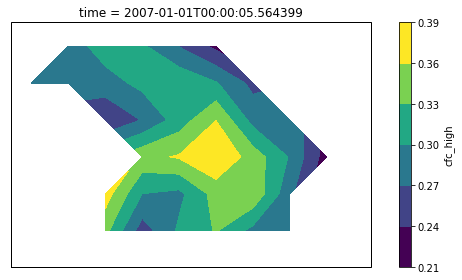

In [8]:
%matplotlib inline
ops.plot_map(clouds_over_bayern, region=bayern)